<a href="https://colab.research.google.com/github/toshkumarashu/repo1/blob/master/DNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [3]:
from scipy import misc
from PIL import Image
import imageio
import keras
from matplotlib import pyplot as plt

In [7]:
from skimage import io
X=[]
Y=[]
base_path="/content/drive/MyDrive/new"
source_path=base_path
for child in os.listdir(source_path):
  print(child)
  sub_path=os.path.join(source_path,child)
  bsub_path=os.path.join(base_path,child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      Qry=Image.open(os.path.join(sub_path,data_file))
      Qry=Qry.convert("RGB")
      Qry=np.array(Qry.resize((224,224)))
      Qry=Qry.reshape([224,224,3])
      Qry=Qry[:,:,2]
      flist=np.array(Qry)
      X.append(flist)
      Y.append(child)

Covid
PNEUMONIA
NORMAL


In [8]:
images_arr=np.asarray(X)
images_arr=images_arr.astype('float32')
images_arr=images_arr/np.max(images_arr)

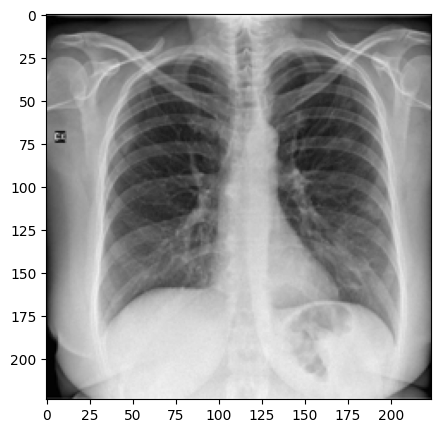

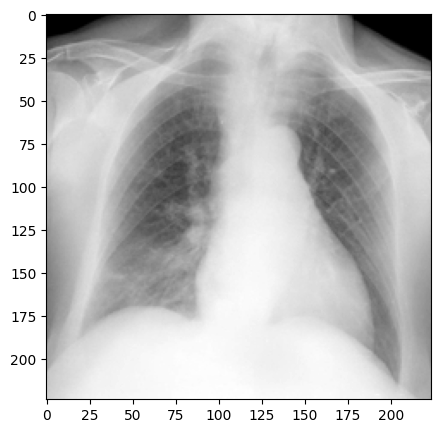

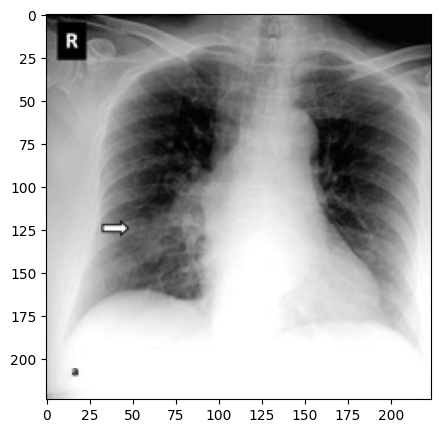

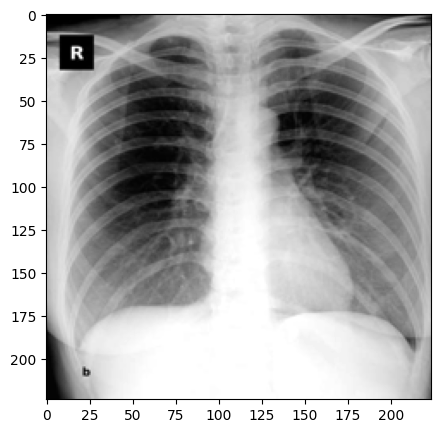

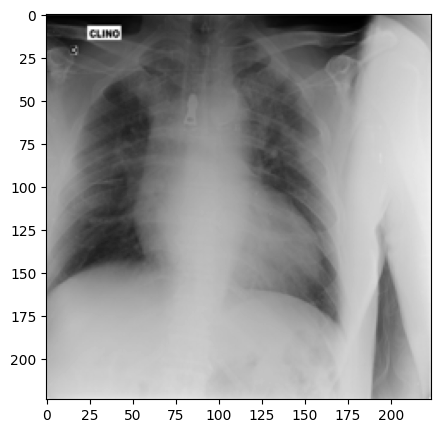

In [9]:
for i in range(5):
  plt.figure(figsize=[5,5])
  curr_img=np.reshape(images_arr[i],(224,224))
  plt.imshow(curr_img,cmap='gray')
  plt.show()

In [13]:
from skimage.transform import rescale,resize
X=[]
for i in range(images_arr.shape[0]):
  img=resize(images_arr[i],(224,224,1),anti_aliasing=True)
  flist=np.array(img.flatten())
  X.append(flist)

In [14]:
X=np.asarray(X)
X=X.astype('float32')
X.shape

(818, 50176)

In [15]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer=LabelBinarizer()
y=labelBinarizer.fit_transform(Y)
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [17]:
len(X_train)
len(y_train)

654

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
import random
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [24]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
dnnModel=Sequential()
dnnModel.add(Dense(256,activation="relu",input_shape=(50176,)))
dnnModel.add(Dense(256,activation="relu"))
dnnModel.add(Dense(128,activation="relu"))
dnnModel.add(Dense(64,activation="relu"))
dnnModel.add(Dropout(0.5))
dnnModel.add(Dense(3,activation="softmax"))
dnnModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,952,451 (49.41 MB)

 Trainable params: 12,952,451 (49.41 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
sgd=SGD(learning_rate=0.01)

In [26]:
dnnModel.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=["accuracy"])

In [27]:
dnnModel.fit(X_train,y_train,epochs=200,batch_size=64,verbose=1,validation_split=0.1)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.4320 - loss: 1.0983 - val_accuracy: 0.4697 - val_loss: 0.9034
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5329 - loss: 1.0263 - val_accuracy: 0.4242 - val_loss: 0.9584
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.6075 - loss: 0.8919 - val_accuracy: 0.7727 - val_loss: 0.6883
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.6876 - loss: 0.7450 - val_accuracy: 0.7273 - val_loss: 0.6512
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.6960 - loss: 0.7498 - val_accuracy: 0.7879 - val_loss: 0.5677
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.7091 - loss: 0.7020 - val_accuracy: 0.8030 - val_loss: 0.5270
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.7428 - loss: 0.6306 - val_accuracy: 0.8485 - val_loss: 0.5756
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7364 - loss: 0.6231 - val_accu

In [28]:
testLoss,testAccuracy=dnnModel.evaluate(X_test,y_test)
print("Test Accuracy=",testAccuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9313 - loss: 0.1737
Test Accuracy= 0.9512194991111755


In [29]:
# Predict a new unseen case
image=images_arr[10]
image=image.reshape(224,224)
image=image/np.max(image)
flist=np.array(image.flatten())
img=np.asarray(flist)
img=img.astype('float32')
img=img.reshape(-1,50176)

In [30]:
pred=dnnModel.predict(img)
pred=labelBinarizer.inverse_transform(pred)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
['Covid']


In [31]:
dnnModel.save('dnnmodel.h5')

In [32]:
from tensorflow.keras.models import load_model
model=load_model('dnnmodel.h5')
pred=model.predict(img)
pred=labelBinarizer.inverse_transform(pred)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
['Covid']
